In [22]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import layers
from keras.models import Sequential



In [2]:
IMAGE_SHAPE = (224, 224)
classifier=tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

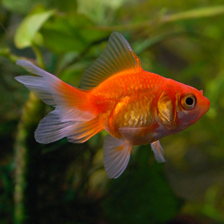

In [4]:
gold_fish=Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish=np.array(gold_fish)/255.0

In [6]:
gold_fish.shape

(224, 224, 3)

In [7]:
gold_fish[np.newaxis,...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [8]:
result=classifier.predict(gold_fish[np.newaxis,...])
result.shape

1/1 [==============================] - 1s 527ms/step


(1, 1001)

In [9]:
predicted_label_index=np.argmax(result)
predicted_label_index

2

In [10]:
image_labels = []
with open("ImageNetLabels.txt","r") as f:
  image_labels=f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [11]:
image_labels[predicted_label_index]

'goldfish'

Load flowers dataset


In [12]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


228813984/228813984 [==============================] - 2s 0us/step


In [13]:
data_dir


'./datasets/flower_photos'

In [14]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


PosixPath('datasets/flower_photos')

In [17]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/9595857626_979c45e5bf_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5602738326_97121e007d_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/6978826370_7b9aa7c7d5.jpg'),
 PosixPath('datasets/flower_photos/daisy/3386988684_bc5a66005e.jpg'),
 PosixPath('datasets/flower_photos/daisy/517054463_036db655a1_m.jpg')]

In [18]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [19]:
roses=list(data_dir.glob('roses/*'))
roses

[PosixPath('datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2960709681_e95940c0f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4765063233_f64440c20b.jpg'),
 PosixPath('datasets/flower_photos/roses/15174615529_144ae28bdb_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5050969148_a0090f762a.jpg'),
 PosixPath('datasets/flower_photos/roses/1645761726_2b1be95472.jpg'),
 PosixPath('datasets/flower_photos/roses/5181899042_0a6ffe0c8a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3065719996_c16ecd5551.jpg'),
 PosixPath('datasets/flower_photos/roses/172311368_49412f881b.jpg'),
 PosixPath('datasets/flower_photos/roses/22325299158_6e32e599f8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/3475572132_01ae28e834_n.jpg'),
 Pos

In [20]:
roses[:5]

[PosixPath('datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2960709681_e95940c0f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4765063233_f64440c20b.jpg'),
 PosixPath('datasets/flower_photos/roses/15174615529_144ae28bdb_n.jpg')]

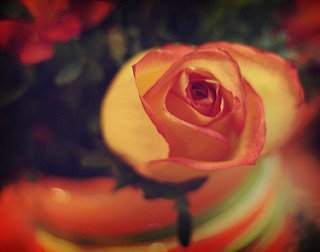

In [24]:
Image.open(str(roses[1]))


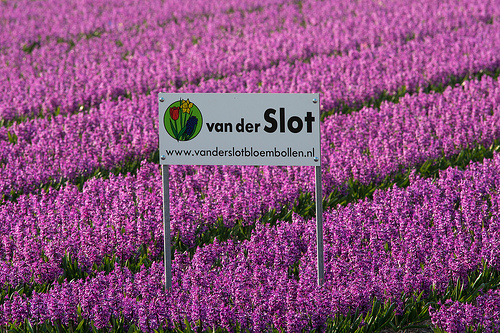

In [25]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

Read flowers images from disk into numpy array using opencv


In [27]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [28]:
flowers_labels_dict = {
  'roses':0,
  'daisy':1,
  'dandelion':2,
  'sunflowers':3,
  'tulips':4,
}

In [29]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2960709681_e95940c0f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4765063233_f64440c20b.jpg'),
 PosixPath('datasets/flower_photos/roses/15174615529_144ae28bdb_n.jpg')]

In [30]:
str(flowers_images_dict['roses'][0])


'datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg'

In [31]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))


In [32]:
img.shape

(240, 320, 3)

In [33]:
cv2.resize(img,(224,224)).shape


(224, 224, 3)

In [36]:
X, y = [], []
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(224,224))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [37]:
X=np.array(X)
y=np.array(y)

Train test split


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [39]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


Make prediction using pre-trained model on new flowers dataset



In [40]:
X[0].shape


(224, 224, 3)

In [41]:
IMAGE_SHAPE+(3,)


(224, 224, 3)

In [42]:
x0_resized=cv2.resize(X[0],IMAGE_SHAPE)
x1_resized=cv2.resize(X[1],IMAGE_SHAPE)
x2_resized=cv2.resize(X[2],IMAGE_SHAPE)

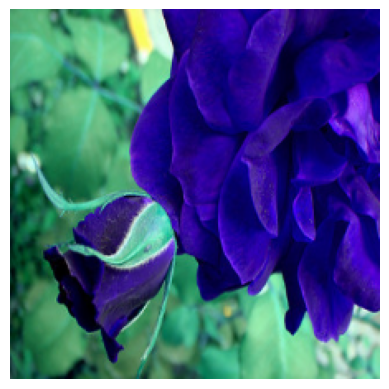

In [44]:
plt.axis('off')
plt.imshow(X[0])

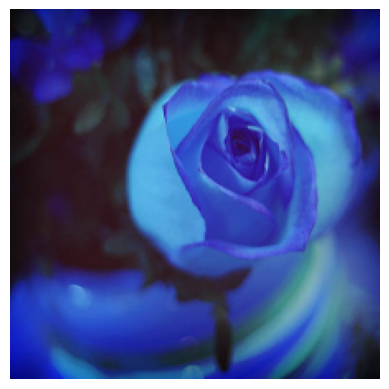

In [45]:
plt.axis('off')
plt.imshow(X[1])


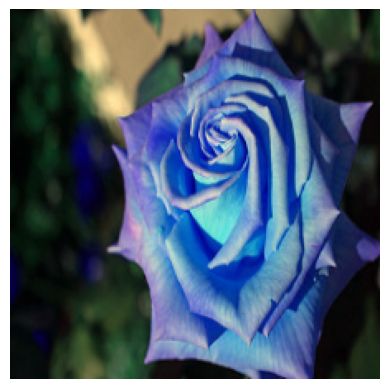

In [46]:
plt.axis('off')
plt.imshow(X[2])


In [48]:
predicted=classifier.predict(np.array([x0_resized,x1_resized,x2_resized]))

1/1 [==============================] - 0s 411ms/step


In [49]:
predicted=np.argmax(predicted,axis=1)
predicted

array([795, 795, 795])

In [50]:
image_labels[795]


'shower curtain'

Now take pre-trained model and retrain it using flowers images


In [53]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer=hub.KerasLayer(feature_extractor_model,input_shape=(224,224,3),trainable=False)

In [54]:
num_of_flowers=5
model=tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [56]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 68s 765ms/step - loss: 0.8624 - acc: 0.6715
Epoch 2/5
86/86 [==============================] - 63s 735ms/step - loss: 0.4252 - acc: 0.8543
Epoch 3/5
86/86 [==============================] - 62s 718ms/step - loss: 0.3317 - acc: 0.8921
Epoch 4/5
86/86 [==============================] - 62s 726ms/step - loss: 0.2778 - acc: 0.9113
Epoch 5/5
86/86 [==============================] - 63s 731ms/step - loss: 0.2379 - acc: 0.9353


In [57]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 21s 697ms/step - loss: 0.3752 - acc: 0.8671


[0.3752410411834717, 0.8671023845672607]